<h1>RANDOM FOREST</h1>

In [1]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np_q4
import pandas as pd
import matplotlib as plotclf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sbs
from sklearn.ensemble import RandomForestClassifier

In [2]:
#CONVERTING DATASET INTO DATAFRAME FOR HEATMAP.
iris_dataset= datasets.load_iris()
data_df= pd.DataFrame(np_q4.column_stack((iris_dataset.data, iris_dataset.target)), columns = iris_dataset.feature_names+['target'])
X_data=data_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)","petal width (cm)"]]
y_target=data_df[['target']]
#can also be done by concat or by using zip function.

In [3]:
# DIVIDING THE DATASET INTO TRAIN TEST DATA.
X_train_data, X_test_data, y_train_target, y_test_target = train_test_split(X_data,y_target,train_size=0.8, random_state=42)


<h3> Displaying mean accuracies at different values of max_depth and number_of_trees</h3>

In [4]:
#MEAN ACCURACY AT DIFFERENT DEPTHS AND NO OF TREES
number_of_trees=[5, 10, 50, 150, 200]
max_depth=[3,5,10,None]
mean_accuracy=[]
depth_list=[]
trees_list=[]
for no_trees in number_of_trees:
    for depth in max_depth:
        clfier_1=RandomForestClassifier(max_depth=depth,n_estimators=no_trees, random_state=42)
        scores=cross_val_score(clfier_1, X_train_data, np_q4.ravel(y_train_target),cv=10)
        print("Mean Accuracy: ", scores.mean(),"at depth= ",depth,"and when no of trees= ",no_trees)
        mean_accuracy.append(scores.mean())
        depth_list.append(depth)
        trees_list.append(no_trees)

Mean Accuracy:  0.9416666666666667 at depth=  3 and when no of trees=  5
Mean Accuracy:  0.9416666666666667 at depth=  5 and when no of trees=  5
Mean Accuracy:  0.9416666666666667 at depth=  10 and when no of trees=  5
Mean Accuracy:  0.9416666666666667 at depth=  None and when no of trees=  5
Mean Accuracy:  0.9416666666666667 at depth=  3 and when no of trees=  10
Mean Accuracy:  0.9249999999999998 at depth=  5 and when no of trees=  10
Mean Accuracy:  0.9166666666666666 at depth=  10 and when no of trees=  10
Mean Accuracy:  0.9166666666666666 at depth=  None and when no of trees=  10
Mean Accuracy:  0.9499999999999998 at depth=  3 and when no of trees=  50
Mean Accuracy:  0.9333333333333332 at depth=  5 and when no of trees=  50
Mean Accuracy:  0.9333333333333332 at depth=  10 and when no of trees=  50
Mean Accuracy:  0.9333333333333332 at depth=  None and when no of trees=  50
Mean Accuracy:  0.9416666666666667 at depth=  3 and when no of trees=  150
Mean Accuracy:  0.92499999999

<h3> Displayng the dataframe</h3>

In [5]:
#CONVERTING THE OUTPUT INTO DATAFRAME 
heat_df=pd.DataFrame(data=list(zip(trees_list,depth_list,mean_accuracy)),columns=['number_of_trees','max_depth','mean_accuracy'])
print(heat_df)

    number_of_trees  max_depth  mean_accuracy
0                 5        3.0       0.941667
1                 5        5.0       0.941667
2                 5       10.0       0.941667
3                 5        NaN       0.941667
4                10        3.0       0.941667
5                10        5.0       0.925000
6                10       10.0       0.916667
7                10        NaN       0.916667
8                50        3.0       0.950000
9                50        5.0       0.933333
10               50       10.0       0.933333
11               50        NaN       0.933333
12              150        3.0       0.941667
13              150        5.0       0.925000
14              150       10.0       0.925000
15              150        NaN       0.925000
16              200        3.0       0.941667
17              200        5.0       0.933333
18              200       10.0       0.933333
19              200        NaN       0.933333


In [6]:
# FINDING THE BEST ACCURACY 
best_accuracy=max(mean_accuracy)    
best_depth_with_highest_accuracy=depth_list[mean_accuracy.index(best_accuracy)]
best_no_of_trees=trees_list[mean_accuracy.index(best_accuracy)]

print("Best depth and no of trees with highest accuracy at accuracy=: ",best_accuracy,"is at depth=: ",best_depth_with_highest_accuracy,"and no of trees=:",best_no_of_trees)


Best depth and no of trees with highest accuracy at accuracy=:  0.9499999999999998 is at depth=:  3 and no of trees=: 50


<h2>Best accuracy is found 95% at depth=3 and number of estimators=50</h2>

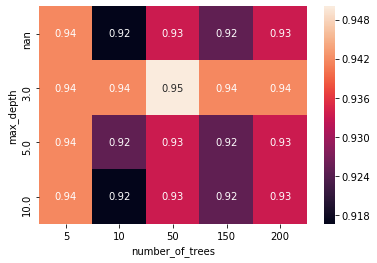

In [7]:
#PLOTTING THE HEATMAP
heat_df=heat_df.pivot(index='max_depth',columns='number_of_trees',values='mean_accuracy')
sbs.heatmap(data=heat_df, annot=True)


<h2> OBSERVATIONS AND ANALYSIS</h2>
<h3>1.Depth= 3 and estimators= 50 which is the optimum value for the classifier and gives us the accuracy of 95%.</h3>
<h3>2.As the number of trees increases to 50, our model uses more random samples to build trees which equalizes the bias created (if any) by voting, hence no overfitting.</h3>
<h3>3.When the depth is 3, it is using best features to generalize the data (petal width and petal length).</h3>
<h3>4.There is no overfitting in random forests because it equalizes all the biases created as it follows the procedure of voting from multiple decision trees for selecting the final output class.</h3>